# <div style="text-align: center"> Applied Machine Learning </div>

###### <div style="text-align: right"> Udit Maniyar<br><br> ES16BTECH11024 </div>

## Theory

###### 1) Hierarchical Clustering

<img src="Data/1_a.jpg" style="width:600px;height:800px;">
<img src="Data/1_b.jpg" style="width:600px;height:800px;">
<img src="Data/1_c.jpg" style="width:600px;height:800px;">

###### 2) Principal Component Analysis

<img src="Data/2_a.jpg" style="width:700px;height:900px;">
<img src="Data/2_b_p1.jpg" style="width:700px;height:900px;">
<img src="Data/2_b_p2.jpg" style="width:700px;height:600px;">
<img src="Data/2_c.jpg" style="width:700px;height:300px;">

## Programming Questions

In [1]:
#Import All required Things
import pandas as pd
import numpy as np
import csv
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

## 3) Clustering

In [2]:
def get_data1():
    data = np.genfromtxt ('dataset1.txt',delimiter=" ",dtype = float)
    return np.array(data)

In [3]:
data = get_data1()

###### Finding the best k for k means Clustering

In [4]:
def bestk_find(data):
    
    sse = []
    for i in range(1,100):
        clf = KMeans(n_clusters=i, random_state=0,n_jobs=-1)
        clf.fit(data)
        sse.append(clf.inertia_)

    plt.plot(range(1,100),sse)
    plt.xlabel("k")
    plt.ylabel("Sum of squared distances of pts to their closest cluster center.")
    plt.title("Error vs K")
    plt.show()
    
    print("Plotting only till k = 10 so that we can find elbow")
    
    
    plt.plot(range(1,10),sse[:9])
    plt.xlabel("k")
    plt.ylabel("Sum of squared distances of pts to their closest cluster center.")
    plt.title("Error vs K")
    plt.show()  

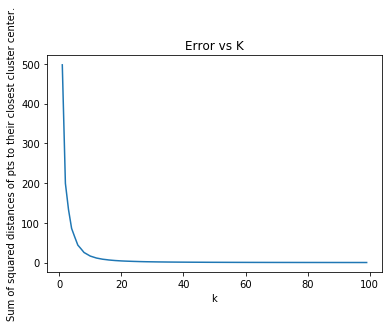

Plotting only till k = 10 so that we can find elbow


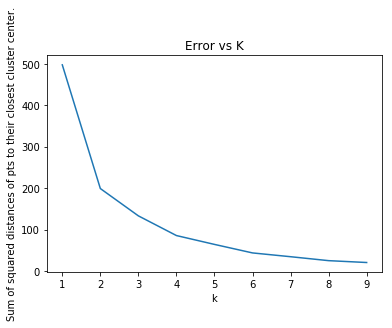

In [5]:
bestk_find(data)

###### Elbow Method
- In Elbow Method we run k-means clustering on dataset for a range of values of k (num_clusters, e.g k=1 to 100), and for each value of k, calculate sum of squared errors (SSE).
- After that, plot a line graph of the SSE for each value of k. If the line graph looks like an arm , the "elbow" on the arm is the value of optimal k (number of cluster).
- Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase k (and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).
- So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.
- From the Above graph it is clear that for k = 2,3,4,5,6 we have an elbow part.

##### Running K means Clustering with k = 2,3,4,5,6

k = 2, SSE :  199.33828097058603


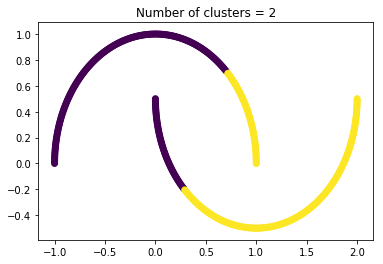

-----------------------------------------------------
k = 3, SSE :  133.42184657381634


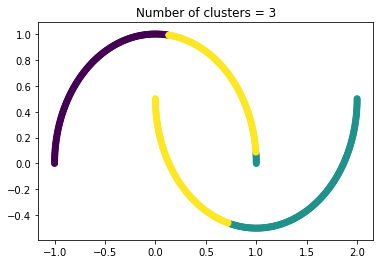

-----------------------------------------------------
k = 4, SSE :  85.92834942405563


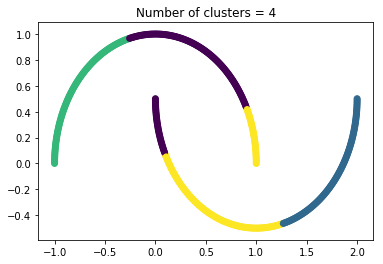

-----------------------------------------------------
k = 5, SSE :  64.58843444714668


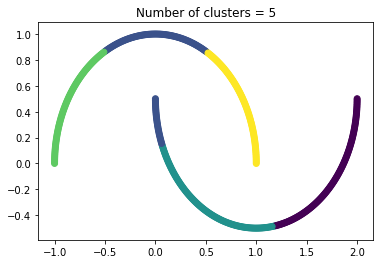

-----------------------------------------------------
k = 6, SSE :  44.04081620509941


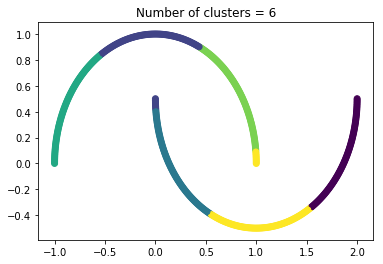

In [6]:
clf = KMeans(n_clusters=2, random_state=0,n_jobs=-1)
clf.fit(data)
print("k = 2, SSE : ",clf.inertia_)
plt.scatter(data[:,0],data[:,-1],c= clf.labels_)
plt.title("Number of clusters = 2")
plt.show()

print("-----------------------------------------------------")
clf = KMeans(n_clusters=3, random_state=0,n_jobs=-1)
clf.fit(data)
print("k = 3, SSE : ",clf.inertia_)
plt.scatter(data[:,0],data[:,-1],c= clf.labels_)
plt.title("Number of clusters = 3")
plt.show()

print("-----------------------------------------------------")

clf = KMeans(n_clusters=4, random_state=0,n_jobs=-1)
clf.fit(data)
print("k = 4, SSE : ",clf.inertia_)
plt.scatter(data[:,0],data[:,-1],c= clf.labels_)
plt.title("Number of clusters = 4")
plt.show()

print("-----------------------------------------------------")

clf = KMeans(n_clusters=5, random_state=0,n_jobs=-1)
clf.fit(data)
print("k = 5, SSE : ",clf.inertia_)
plt.scatter(data[:,0],data[:,-1],c= clf.labels_)
plt.title("Number of clusters = 5")
plt.show()



print("-----------------------------------------------------")

clf = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
clf.fit(data)
print("k = 6, SSE : ",clf.inertia_)
plt.scatter(data[:,0],data[:,-1],c= clf.labels_)
plt.title("Number of clusters = 6")
plt.show()

##### b) Implement your own DBSCAN algorithm on the same dataset and plot the data points.

In [7]:
def dbscan(data,epsilon  = 0.1,Minpts = 4):
    label = np.zeros(len(data))
    cur_id = 0
    
    for idx in range(len(data)):
        
        if label[idx]!=0:
            continue
        
        neigbourpts = neigbour(data,idx,epsilon)
        
        if len(neigbourpts) < Minpts:
            label[idx] = -1
            
        else:
            cur_id += 1
            label[idx] = cur_id
            i = 0
            
            while i<len(neigbourpts):
                next_pt = neigbourpts[i]
                
                if label[next_pt] == -1:
                    label[next_pt] = cur_id
                elif label[next_pt]==0:
                    label[next_pt] = cur_id
                    
                    neighbour_i = neigbour(data,next_pt,epsilon)
                    
                    if len(neighbour_i)>=Minpts:
                        neigbourpts = neigbourpts + neighbour_i
                i+=1
    return label
                
def neigbour(data,idx,epsilon):
    neighbours = []
    for i in range(len(data)):
        if i!=idx and np.linalg.norm(data[i] - data[idx]) <epsilon:
            neighbours.append(i)
    return neighbours
    

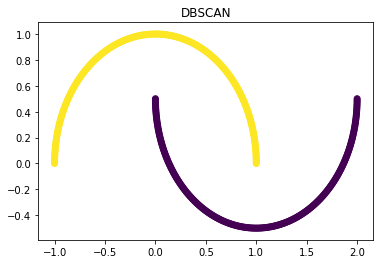

In [8]:
label = dbscan(data)
plt.scatter(data[:,0],data[:,-1],c= label)
plt.title("DBSCAN")
plt.show()

###### c) What differences do you see between the DBSCAN and k-means methods, and why?

- K means doesnt work well with the data given but db scan works well.
- This is because in k means clustering the clusters formed are always radial in shape but DBScan can take much complex formation depending on the density of the points given.
- Here in the above case DBscan clearly clusters the data set into 2 clusters but K means tries to cluster them into circles and fails because there is no clear circle in the data.


###### d) Use (a) and (b) for dataset2, and compare the performance.

In [9]:
def get_data2():
    data = np.genfromtxt ('dataset2.txt',delimiter=" ",dtype = float)
    return np.array(data)

k = 3, SSE :  5534.091396421845


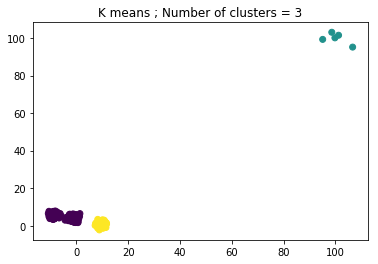

In [10]:
data = get_data2()
clf = KMeans(n_clusters=3, random_state=0,n_jobs=-1)
clf.fit(data)
print("k = 3, SSE : ",clf.inertia_)
plt.scatter(data[:,0],data[:,-1],c= clf.labels_)
plt.title("K means ; Number of clusters = 3")
plt.show()

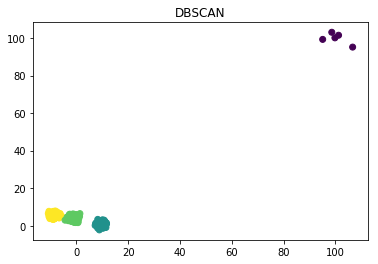

In [11]:
label = dbscan(data,epsilon = 2,Minpts = 4)
plt.scatter(data[:,0],data[:,-1],c= label)
plt.title("DBSCAN")
plt.show()
#Using Epsilon= 2 and MinpTs =4

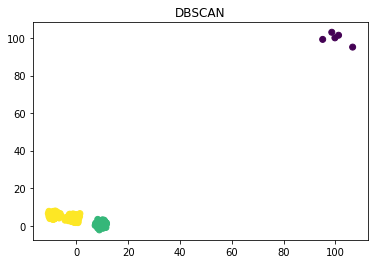

In [12]:
label = dbscan(data,epsilon = 4,Minpts = 4)
plt.scatter(data[:,0],data[:,-1],c= label)
plt.title("DBSCAN")
plt.show()

###### Observations

- On the dataset2 when we use k = 3 three clusters are formed by K Means Classifier. 
- DBScan also forms the same clusters but the parameters(epsilon , Minpts) which are required is not very clear form the scatterplot.
- As you can se above the first plot was obtained when epsilon = 2 and Minpts  = 4, But when we use epsilon  = 4 and Minpts = 4 we get the same cluster as that of the K means Clustering.
- DBSCAN is sensitive to user parameters MinPts and Epsilon. Slight change in the values may produce different clustering results and prior knowledge about these values cannot be understood that easily.
- In conclusion if we already know the number of clusters and their shape and we should first try kmeans clustering which could turnout to be usefull else we should try parameter tuning with DBscan.

#### DBscan vs K Means Clustering

###### DBScan
- Clusters of arbitrary shape can be formed
- It is Robust to Outliers because noise will not be densely reachable from core point and hence 
- DBScan Requires connected regions of sufficiently high density
- We Need to set Epsilon and Minpts.
- DBscan is Sensitive to user parameters MinPts and Epsilon

###### K Means
- k means clustering(With euclidean distance) the clusters formed are always radial in shape.
- Sensitive to outliers
- Getting Hold of a good k is difficult
- It produces cluster with uniform size even when the input data has different sizes.
- Normalization or standardization will completely change the final results.

### 4) Dimensionality Reduction

In [13]:
def get_iris():
    data = np.genfromtxt ('iris.data',delimiter=",",dtype = str)
    for i in range(len(data)):
        if data[i][4] =='Iris-setosa':
            data[i][4] = 0
        elif data[i][4]=='Iris-versicolor':
            data[i][4] = 1
        elif data[i][4] == 'Iris-virginica':
            data[i][4] = 2
    data = data.astype(np.float)

    return data

##### a) PCA on Iris DataSet

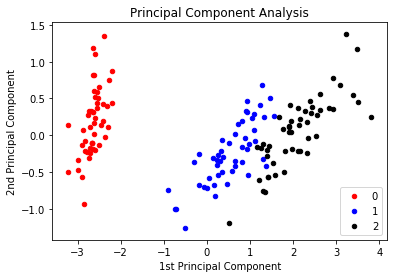

In [14]:
data = get_iris()
clf = PCA(n_components=2)
clf.fit(data[:,:-1])
X = clf.transform(data[:,:-1])
cdict = {0: 'red', 1: 'blue', 2: 'black'}
fig, ax = plt.subplots()
for i in range(3):
    ix = np.where(data[:,-1] == float(i))
    ax.scatter(X[:,0][ix], X[:,-1][ix], c = cdict[i], label = i, s = 20)
ax.legend()
plt.title("Principal Component Analysis")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

plt.show()

As we can see in the above figure red represents Iris-setosa, blue represents Iris-versicolor, black represents Iris-virginica.
##### PCA
- Principal Component Analysis or PCA is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.
- From the above figure we can clearly see that PCA has not separated the clusters into clear separate components.
- From this we may understand that the underlying data might not be linear.

##### b) t-SNE on Iris Data Set

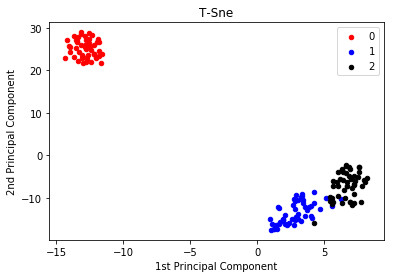

In [58]:
data = get_iris()
clf = TSNE(n_components=2)
# clf.fit(data[:,:-1])
X = clf.fit_transform(data[:,:-1])
cdict = {0: 'red', 1: 'blue', 2: 'black'}
fig, ax = plt.subplots()
for i in range(3):
    ix = np.where(data[:,-1] == float(i))
    ax.scatter(X[:,0][ix], X[:,-1][ix], c = cdict[i], label = i, s = 20)
ax.legend()
plt.title("T-Sne")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

plt.show()

###### T-sne

- t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction
- t-SNE first creates a probability distribution that defines the relationships between the (neighbouring)points in high-dimensional space.
- It then tries to recreate a low dimensional space that follows that probability distribution as best as possible.
- To compare Probability Distribution KL Divergence is used.
- Since T-sne is a non-linear technique it converts the higher dimensional data into lower dimension better than PCA(Sometimes).
- But each time we run Tsne It converges to local minima, So we may get different scatter plot for the other time we run this.


- One Difference between PCA and T-sne Scatter Plots are In Pca's Scatter Plot the clusters are scattered whereas in the T-Sne's Scatter Plot the clusters are densely closed this is because the 
- The t-SNE algorithm focuses to preserve the local distances of the high-dimensional data in some mapping to low-dimensional data.

##### c) PCA and TSNE on Swiss Roll DataSet

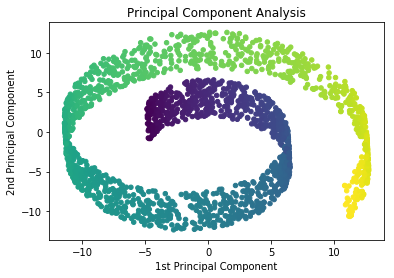

----------------------------------------------------------------------------


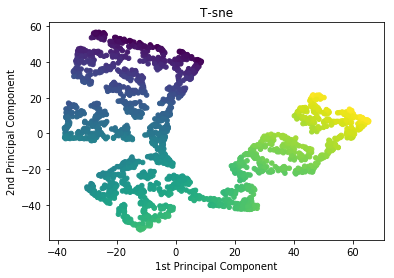

In [16]:
data, _ = make_swiss_roll(2000)
# print(_)
clf = PCA(n_components=2)
X = clf.fit_transform(data)
plt.scatter(X[:,0], X[:,-1],c=_, s = 20)
plt.title("Principal Component Analysis")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.show()
print("----------------------------------------------------------------------------")
clf = TSNE(n_components=2)
X = clf.fit_transform(data)
plt.scatter(X[:,0], X[:,-1],c = _, s = 20)
plt.title("T-sne")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.show()

##### PCA vs T-SNE
- One drawback of PCA is that it is a linear projection, meaning it can’t capture non-linear dependencies. In the above data PCA has given us a spiral looking curve whereas the T-Sne has given us the linear surface which makes up the Curve.
- This is because PCA gives only linear projection it is basically like casting a shadow. There is no direction from which we can look at this swiss roll that would allow us to open it up. PCA doesn't see that the points are actually a line that's been rolled up.
- t-SNE attempts to understand the underlying structure of the swiss roll by preserving the local neighboring points.
- tSNE takes more time than PCA.